In [2]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import math
import pandas as pd

In [3]:
def cities_distance(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xd = x2 - x1
            yd = y2 - y1
            dst = (xd*xd + yd*yd)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xd = x2 - x1
            yd = y2 - y1
            dst = (xd*xd + yd*yd)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data

In [4]:
N=9
List_of_cities  = [[1,2],[3,4],[8,7],[10,1]
             ,[3,1],[5,10],[6,7],[12,4],[9,5]]
val = cities_distance(List_of_cities).values()

In [5]:

def totaldist(cities):
    total = sum(cities_distance(cities).values())
    return total
totaldist(List_of_cities)

52.78024179537479

In [6]:
def path_gen(cities):
    path = random.sample(cities, len(cities))
    return path
list= path_gen(List_of_cities)
print(list)

[[8, 7], [12, 4], [6, 7], [1, 2], [9, 5], [5, 10], [3, 4], [3, 1], [10, 1]]


In [7]:

import numpy as np
# city_names = ['Kalyani', 'Ranaghat', 'Sealdah', 'Bidhannagar','Naihati','Halisahar','DumDum']
def plot_p(cities):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    j =[item[0] for item in list]
    k = [item[1] for item in list]
   
    
#     for i in range(N):
#         plt.annotate((j[i], k[i]),horizontalalignment='center', verticalalignment='bottom',
#                     )
    plt.show()
    return

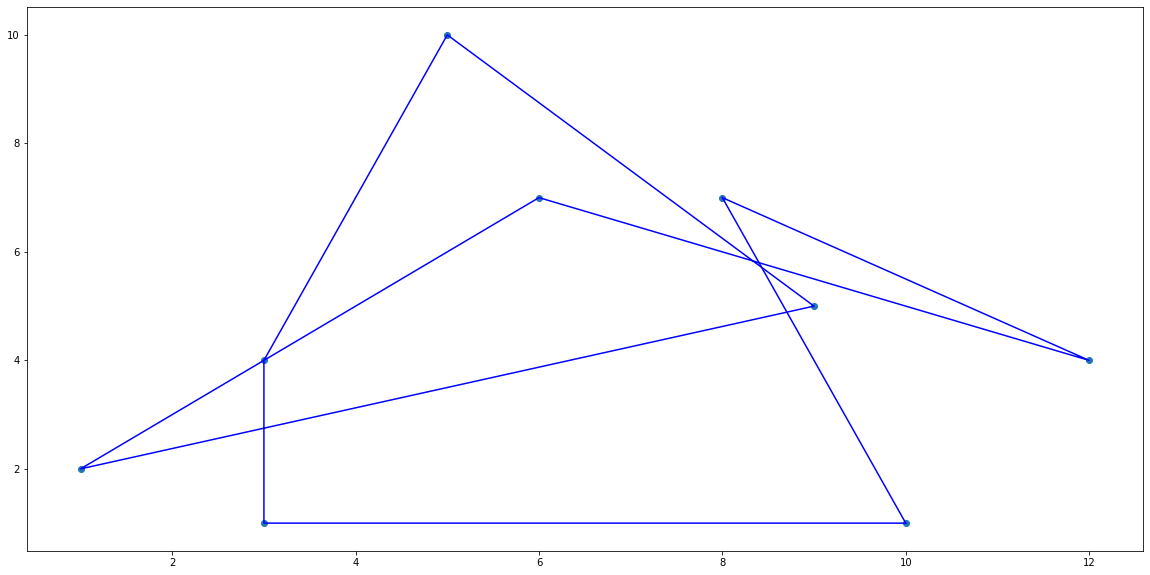

In [8]:
plot_p(list)


In [9]:
def initialPopulation(cities, populationSize):
    population = [path_gen(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(List_of_cities,7)

In [10]:
for index, p_plot in enumerate (population):
    print('Initial Population '+ str(index),p_plot)


Initial Population 0 [[1, 2], [3, 1], [6, 7], [12, 4], [5, 10], [3, 4], [10, 1], [9, 5], [8, 7]]
Initial Population 1 [[12, 4], [6, 7], [5, 10], [1, 2], [10, 1], [3, 1], [9, 5], [8, 7], [3, 4]]
Initial Population 2 [[1, 2], [8, 7], [3, 4], [12, 4], [6, 7], [10, 1], [3, 1], [5, 10], [9, 5]]
Initial Population 3 [[5, 10], [10, 1], [6, 7], [8, 7], [3, 1], [12, 4], [3, 4], [1, 2], [9, 5]]
Initial Population 4 [[6, 7], [5, 10], [3, 4], [9, 5], [3, 1], [12, 4], [1, 2], [8, 7], [10, 1]]
Initial Population 5 [[8, 7], [3, 1], [1, 2], [10, 1], [6, 7], [5, 10], [9, 5], [12, 4], [3, 4]]
Initial Population 6 [[12, 4], [1, 2], [9, 5], [8, 7], [6, 7], [3, 1], [5, 10], [3, 4], [10, 1]]


In [11]:
def path_fitness(cities):
    total_dis = totaldist(cities)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
path_fitness(List_of_cities)

0.018946483873206344

In [12]:
def path_ranking(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
path_ranking(population)

[(0, 0.018596400382396218),
 (5, 0.01856271262642847),
 (6, 0.017411277444395516),
 (1, 0.016906667787184224),
 (3, 0.015728372156418674),
 (4, 0.015247190331051248),
 (2, 0.0145944374929325)]

In [13]:
def selection(pop, eliteSize):
    #output = path_ranking(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution. 
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
                
    return selected_values

In [14]:
out11 = path_ranking(population)
selected_values = selection(out11,N-2)
# print(selected_values)

In [15]:
def mating(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = mating(population, selected_values)

In [16]:
def breed(first_parent, second_parent):
    gen1= int(random.random() * len(first_parent))
    gen2 = int(random.random() * len(second_parent))
    
    first_gen = min(gen1, gen2)
    last_gen = max(gen1, gen2)

    total_parent1 = [first_parent[i] for i in range(first_gen, last_gen)]
    total_parent2 = [i for i in second_parent if i not in total_parent1]

    total = total_parent1 + total_parent2
    return total

In [17]:
def breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
breed_population(mp,2)

[[[1, 2], [3, 1], [6, 7], [12, 4], [5, 10], [3, 4], [10, 1], [9, 5], [8, 7]],
 [[8, 7], [3, 1], [1, 2], [10, 1], [6, 7], [5, 10], [9, 5], [12, 4], [3, 4]],
 [[12, 4], [6, 7], [10, 1], [8, 7], [3, 1], [1, 2], [5, 10], [9, 5], [3, 4]],
 [[6, 7], [5, 10], [1, 2], [10, 1], [3, 1], [12, 4], [3, 4], [9, 5], [8, 7]],
 [[8, 7], [6, 7], [5, 10], [10, 1], [3, 1], [12, 4], [3, 4], [1, 2], [9, 5]],
 [[6, 7], [5, 10], [3, 4], [9, 5], [3, 1], [12, 4], [1, 2], [8, 7], [10, 1]],
 [[5, 10], [12, 4], [1, 2], [9, 5], [8, 7], [6, 7], [3, 1], [3, 4], [10, 1]]]

In [18]:
def mutatation(ind, mutat_rate):
    for exc in range(len(ind)):
        if(random.random() < mutat_rate):
            exc_with = int(random.random() * len(ind))
            
            city1 = ind[exc]
            city2 = ind[exc_with]
            
            ind[exc] = city2
            ind[exc_with] = city1
    return ind


In [24]:
def mutatation_population(population, mutat_rate):
    mutated_population = [mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
mutatation_population(population, 0.01)

[[[1, 2], [3, 1], [6, 7], [12, 4], [5, 10], [3, 4], [10, 1], [9, 5], [8, 7]],
 [[12, 4], [6, 7], [5, 10], [1, 2], [10, 1], [3, 1], [9, 5], [8, 7], [3, 4]],
 [[1, 2], [8, 7], [3, 4], [12, 4], [6, 7], [10, 1], [3, 1], [5, 10], [9, 5]],
 [[5, 10], [10, 1], [6, 7], [8, 7], [3, 1], [12, 4], [3, 4], [1, 2], [9, 5]],
 [[6, 7], [5, 10], [3, 4], [9, 5], [3, 1], [12, 4], [1, 2], [8, 7], [10, 1]],
 [[8, 7], [3, 1], [1, 2], [10, 1], [6, 7], [5, 10], [9, 5], [12, 4], [3, 4]],
 [[12, 4], [1, 2], [9, 5], [8, 7], [6, 7], [3, 1], [5, 10], [3, 4], [10, 1]]]

In [23]:
def next_gen(existing_gen, eliteSize, mutat_rate):
    pop = path_ranking(existing_gen)
    
    selected_values = selection(pop, eliteSize)
   
    my_mating_pool = mating(existing_gen, selected_values)
    tot = breed_population(my_mating_pool, eliteSize)
    following_gen = mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
next_gen(population, 5, 0.01)

[[[1, 2], [3, 1], [6, 7], [12, 4], [5, 10], [3, 4], [10, 1], [9, 5], [8, 7]],
 [[8, 7], [3, 1], [1, 2], [10, 1], [6, 7], [5, 10], [9, 5], [12, 4], [3, 4]],
 [[12, 4], [1, 2], [9, 5], [8, 7], [6, 7], [3, 1], [5, 10], [3, 4], [10, 1]],
 [[12, 4], [6, 7], [5, 10], [1, 2], [10, 1], [3, 1], [9, 5], [8, 7], [3, 4]],
 [[5, 10], [10, 1], [6, 7], [8, 7], [3, 1], [12, 4], [3, 4], [1, 2], [9, 5]],
 [[12, 4], [6, 7], [5, 10], [1, 2], [10, 1], [3, 1], [9, 5], [8, 7], [3, 4]],
 [[1, 2], [10, 1], [6, 7], [5, 10], [3, 1], [12, 4], [3, 4], [9, 5], [8, 7]]]

In [21]:
# def get_names(result_lst, cities, name_lst):
#     names = []
#     for index,value in enumerate(result_lst):
#         for i,v in enumerate(cities):
#             if value == v:
#                 names.append(name_lst[i])
#     return names

Incipient distance: 42.20537375935296
Eventual distance: 32.55522499588327


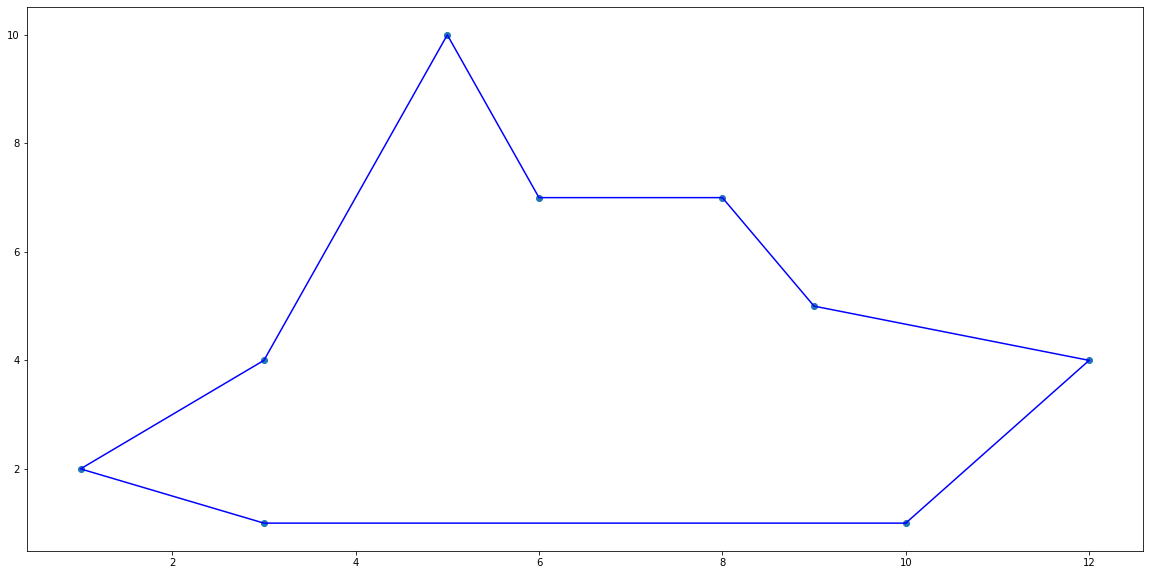

In [22]:
def GA(cities, population_size, eliteSize, mutat_rate, generations):
    population = initialPopulation(cities,population_size)
    #print(population_)
    print("Incipient distance: " + str(1 / path_ranking(population)[0][1]))
    for i in range(generations):
        population = next_gen(population, eliteSize, mutat_rate)
        #print(population)
    
    print("Eventual distance: " + str(1 / path_ranking(population)[0][1]))
    optimal_route_id = path_ranking(population)[0][0]
    optimal_route = population[optimal_route_id]
#     ordered_cities = get_names(optimal_route,cities)
#     print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_p(optimal_route)
    return optimal_route

result_lst = GA(List_of_cities, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)